**Calculating clusters of colors**
***
In the previous step I calculated all color palettes, here I'm making clusters of those palettes, so we are making groups of similar palettes.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# loading the trainset dataset to calculate the clusters
data = pd.read_csv("CSV's/trainset_color_palletes.csv")

In [46]:
# Slicing the pallete columns
X_prep = data.iloc[:,6:-9]

8 instance
9 instance
10 instance
11 instance
12 instance
13 instance
14 instance
15 instance
16 instance
17 instance
18 instance
19 instance
20 instance
21 instance
22 instance
23 instance
24 instance
25 instance
26 instance
27 instance
28 instance
29 instance
30 instance
31 instance
32 instance
33 instance
34 instance
35 instance
36 instance
37 instance
38 instance
39 instance


Text(0.5, 1.0, 'Slhouette score showing the optimal k')

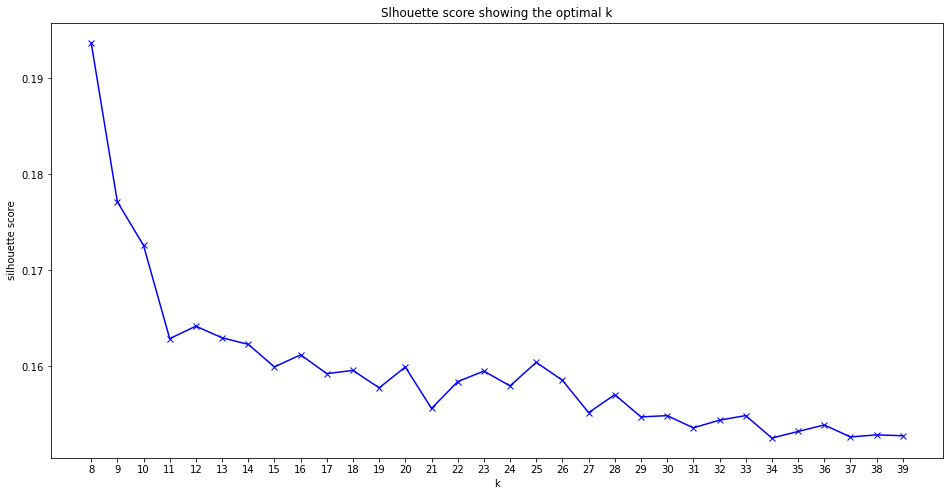

In [17]:
# Ploting the groups silhouette
K = range(8, 40)
silhouette = []

for k in K:
    print(k,'instance')
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

**Decided on 40 clusters, pickling the model**

In [48]:
kmeans = KMeans(n_clusters=40)
kmeans.fit(X_prep)

KMeans(n_clusters=40)

In [27]:
data['color_cluster'] = kmeans.predict(X_prep)
data.to_csv("CSV's/trainset_color_palletes_clustered.csv")

**Updating the museum dataset with clusters**

In [51]:
data = pd.read_csv("CSV's/artic_edu_Valid_paintings_pallete.csv")

In [52]:
data.iloc[:,8:]

,c1_r,c1_g,c1_b,c2_r,c2_g,c2_b,c3_r,c3_g,c3_b,c4_r,c4_g,c4_b,c5_r,c5_g,c5_b
0,0.675297,0.542384,0.408268,0.477338,0.482700,0.421463,0.299851,0.433810,0.508885,0.541464,0.626463,0.638488,0.322627,0.394819,0.365084
1,0.319773,0.383594,0.318466,0.552279,0.593119,0.568339,0.533336,0.534608,0.394929,0.671043,0.654960,0.582450,0.407706,0.457314,0.359893
2,0.530392,0.538601,0.643541,0.677863,0.685382,0.775079,0.622054,0.618746,0.706719,0.731521,0.689999,0.713697,0.444741,0.467477,0.556649
3,0.360716,0.345150,0.334518,0.873524,0.843922,0.790979,0.638892,0.576125,0.487791,0.513535,0.462137,0.394302,0.755240,0.703947,0.623371
4,0.654724,0.706967,0.749097,0.441853,0.481301,0.477897,0.548538,0.594579,0.613860,0.384348,0.385085,0.349139,0.744032,0.792030,0.828221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.150863,0.131768,0.089021,0.742721,0.598897,0.331666,0.008826,0.018289,0.011615,0.512608,0.395758,0.237527,0.269423,0.245766,0.199563
1480,0.219971,0.248647,0.189532,0.528748,0.487225,0.348594,0.131751,0.132206,0.111348,0.335680,0.356912,0.270427,0.821077,0.692954,0.533354
1481,0.719233,0.659838,0.479665,0.629917,0.540893,0.354676,0.364529,0.353666,0.252998,0.849368,0.835368,0.740351,0.794704,0.739778,0.576056
1482,0.434822,0.380385,0.315100,0.218682,0.177224,0.139430,0.671227,0.570837,0.484357,0.320777,0.277440,0.225095,0.406887,0.206824,0.125818


In [55]:
x = data.iloc[:,8:]
data['color_cluster'] = kmeans.predict(x)

In [59]:
data.drop(columns=['Unnamed: 0']).to_csv("CSV's/artic_edu_Valid_paintings_pallete_clustered.csv")

**Pickling model to future use**

In [49]:
import pickle

filename = 'Model/models/model_clustering.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [2]:
import pandas as pd

In [3]:
# loading the trainset dataset to calculate the clusters
data = pd.read_csv("CSV's/trainset_color_palletes.csv")

In [4]:
data.loc[60:]

,Unnamed: 0,year,artiste,style,id,in_train,c1_r,c1_g,c1_b,c2_r,...,c5_b,rgb_1,rgb_2,rgb_3,rgb_4,rgb_5,avg_r,avg_g,avg_b,avg_color
60,60,1926.0,Lyonel Feininger,Cubism,19385.jpg,True,0.845156,0.805495,0.704809,0.230821,...,0.355406,"[216.0, 205.0, 180.0]","[59.0, 45.0, 43.0]","[175.0, 171.0, 144.0]","[98.0, 89.0, 75.0]","[153.0, 136.0, 91.0]",140.0,129.0,106.0,"(140.0, 129.0, 106.0)"
61,61,1926.0,Lyonel Feininger,Cubism,19385.jpg,True,0.601691,0.532526,0.355179,0.686360,...,0.704681,"[153.0, 136.0, 91.0]","[175.0, 171.0, 144.0]","[59.0, 45.0, 43.0]","[98.0, 90.0, 75.0]","[215.0, 205.0, 180.0]",140.0,129.0,106.0,"(140.0, 129.0, 106.0)"
62,62,1905.0,Auguste Herbin,Fauvism,80897.jpg,True,0.513743,0.303155,0.220467,0.212537,...,0.095225,"[131.0, 77.0, 56.0]","[54.0, 61.0, 59.0]","[209.0, 152.0, 144.0]","[184.0, 121.0, 60.0]","[32.0, 29.0, 24.0]",122.0,88.0,69.0,"(122.0, 88.0, 69.0)"
63,63,NaN,Utagawa Kuniyoshi,Ukiyo-e,99733.jpg,True,0.323901,0.286276,0.201426,0.727661,...,0.049654,"[83.0, 73.0, 51.0]","[186.0, 177.0, 155.0]","[5.0, 3.0, 2.0]","[141.0, 134.0, 114.0]","[137.0, 13.0, 13.0]",110.0,80.0,67.0,"(110.0, 80.0, 67.0)"
64,64,NaN,Utagawa Kuniyoshi,Ukiyo-e,73690.jpg,True,0.639031,0.596921,0.498358,0.268547,...,0.008028,"[163.0, 152.0, 127.0]","[68.0, 60.0, 45.0]","[118.0, 109.0, 87.0]","[199.0, 187.0, 160.0]","[3.0, 2.0, 2.0]",110.0,102.0,84.0,"(110.0, 102.0, 84.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80016,80724,1957.0,Tihamer Gyarmathy,Abstract Art,36690.jpg,True,0.154715,0.128208,0.103823,0.499053,...,0.184437,"[39.0, 33.0, 26.0]","[127.0, 99.0, 50.0]","[107.0, 35.0, 33.0]","[162.0, 151.0, 70.0]","[70.0, 80.0, 47.0]",101.0,80.0,45.0,"(101.0, 80.0, 45.0)"
80017,80725,1954.0,Anne Ryan,Abstract Expressionism,23862.jpg,True,0.849841,0.788505,0.666489,0.758745,...,0.646783,"[217.0, 201.0, 170.0]","[193.0, 150.0, 97.0]","[232.0, 225.0, 212.0]","[114.0, 71.0, 38.0]","[182.0, 174.0, 165.0]",188.0,164.0,136.0,"(188.0, 164.0, 136.0)"
80018,80726,1948.0,Jackson Pollock,Action painting,25525.jpg,True,0.567831,0.545140,0.538268,0.296724,...,0.150339,"[145.0, 139.0, 137.0]","[76.0, 63.0, 60.0]","[104.0, 96.0, 94.0]","[196.0, 191.0, 188.0]","[54.0, 42.0, 38.0]",115.0,106.0,104.0,"(115.0, 106.0, 104.0)"
80019,80727,NaN,Bernardo Strozzi,Baroque,47038.jpg,True,0.064013,0.262392,0.341390,0.994841,...,0.194854,"[16.0, 67.0, 87.0]","[254.0, 252.0, 251.0]","[35.0, 32.0, 32.0]","[200.0, 161.0, 123.0]","[103.0, 73.0, 50.0]",122.0,117.0,109.0,"(122.0, 117.0, 109.0)"
